<img style="float: right;" src="https://nens.lizard.net/media/projecten/lizard_tutorial/lizard_logo.png" width="200"/>

# Getting familiair with Lizard Rasters API V4


Welcome! In this Notebook we will help you get more familiair with the Lizard Rasters API V4. If you have feedback or questions about this Notebook, please do not hesitate to contact us via servicedesk@nelen-schuurmans.nl. 

## Introduction
Lizard is a cloud-based datawarehouse & analytics platform for data that describes the physical environment. The Lizard Raster Server allows for storage of (temporal) raster data. 

The storage of rasters data and the disclosure in the API within Lizard are focussed on high performance and retrieving relevant information out of it for data science & visualisation purposes. There are options to make advanced queries to:

- Retrieve values for a specific location or area

- Analyse data for a particular period or moment in time

- Map visualization in the lizard portal

- Exporting to a geotiff file

- Connecting with external applications via WMS

- Base block for on-the-fly map calculations and conversions

- API interactions: list, create, (partial) update, retrieve and delete

If you wish to skip to a certain question in this Notebook you can fold out the **Table of Contents** in the panel on the left here.<br> 
<----------------------------


# Raster Server

Let us first explain a bit more about rasters and the way Lizard stores them.

A raster is a grid of cells organized into rows and columns. Each cell contains a value that represents real-world phenomena, such as water depth. The values can be continuous (e.g. 28.5 degrees) or integer numbers. Integer numbers can represent classes, which is for example used for the raster land use (e.g. 1: Water, 2: Land).

Raster data can be static or temporal: 
* Rasters with <b>static</b> data: each raster grid cell contains one value which is constant over a time period
* Rasters with <b>temporal</b> data: each raster grid cell contains one value which can change over time

Both types of rasters can be stored in Lizard's Raster Server. Examples of rasters with static data are digital elevation models and land cover maps (can be temporal as well, but these values do not change rapidly over time). Examples of temporal raster datasets are radar measurements of precipitation, air quality or hydrodynamic model results such as flood depths.



Raster with static data: Digital elevation model | Raster with temporal data: Daily rainfall
- | - 
<img src="https://nens.lizard.net/media/projecten/lizard_tutorial/static_raster_example.PNG" alt="Drawing" style="width: 500px;"/> | <img src="https://nens.lizard.net/media/projecten/lizard_tutorial/temporal_raster_example.PNG" alt="Drawing" style="width: 530px;"/>
https://nens.lizard.net/api/v4/rasters/1d65a4e1-ac2f-4e66-9e52-1d130d870a34/ | https://nens.lizard.net/api/v4/rasters/a6ce2c34-fb3f-42f8-9077-784d80cde9c7/


---



## The Raster data model explained Raster layers within Lizard
When working with Rasters in Lizard you'll have to deal with two main compontents of the raster data model: 
`Raster source` and `Raster layer`. You will first configure a `raster source`, then you'll upload your raster data and that you will publish you data by configuring a `raster layer`. 

<img src="https://nens.lizard.net/media/projecten/lizard_tutorial/raster_structure.PNG" alt="Drawing" style="width: 200px;"/>

### Raster Source
`Raster Source` is the first component you'll have to deal with first when uploading your raster data. The Raster Source will describe all characteristics of your raster and how Lizard has to interpred the data you're going to upload. For example, if the raster is temporal or non-temporal. And if temporal at which interval the raster series will be supplied.

When configuring a raster source, it does not contain any raster data yet. Once configured you can [upload your data to Lizard](https://colab.research.google.com/drive/1m9ECiz_mkkMWdxksAOUReOMHK4X7u-bH#scrollTo=Pd4OivLNX_eC). Lizard requires your data to be in GeoTIFF format. 


Below you'll find an overview of the attributes of a raster source and which are mandatory, optional or read-only. 

| **Attribute** | **Example** | **Requirement**| **Format**
|:------|:------|:------|:------|
|   **id**  | 2 |Read only| integer
|   **uuid**  | 1d65a4e1-ac2f-4e66-9e52-1d130d870a34 |Read only | string(36)
|   **url**  | https://nens.lizard.net/api/v4/rasters/1d65a4e1-ac2f-4e66-9e52-1d130d870a34/ |Read only| string(76) https://nens.lizard.net/api/v4/rasters/<--uuid-->/
|   **name**  | Hoogte |Mandatory| string(64)
|   **organisation uuid**  | eabd2988-1b59-4855-9b82-4b5efa1cef28" |Mandatory| Organisations use an uuid (universal id). The organisation uuid's can be found here: https://nens.lizard.net/api/v4/organisations 
|   **access modifier**  | Public |Mandatory| Public, Common, Private. For more info go to https://docs.lizard.net/b_usermanagement.html#organisations
|   **supplier**  | john.doe |Optional| string (recommended to use your own username or the one from your service account)
|   **supplier_code**  | raster_1 |Optional| string (code that can be used for your own administration) 
|   **temporal**  | false |Optional| true, false (default)
|   **interval**  | 1 01:00:00|Optional| ISO 8601 format. only required when temporal is true
|   **first value timestamp**  | 1970-01-01T00:00:00Z |Read only| string in ISO 8601 format
|   **last value timestamp**  | 1970-01-01T00:00:00Z |Read only | string in ISO 8601 format
|   **spatial bounds**  | "west": 3.227518327467766, "east": 7.275203840803029, "north": 53.59620052933691, "south": 50.72844979465181 |Read only | coordinates in WGS84
|   **projection**  | EPSG:28992 |Read only | spatial reference system
|   **origin_x**  | 0.0 |Read only| in WGS84, null is allowed
|   **origin_y**  | 0.0 |Read only| in WGS84, null is allowed
|   **pixelsize_x**  | 0.5 |Read only| null is allowed
|   **pixelsize_y**  | -0.5|Read only| null is allowed
|   **Created**  | 2020-04-02T08:56:36Z |Read only| string in ISO 8601 format
|   **Last_modified**  | 2020-07-02T08:56:36Z |Read only | string in ISO 8601 format
|   **writable**  | false |Optional| true, false (default)
|   **layers**  | false |Optional| true, false (default)
|   **labeltypes**  | false |Optional| true, false (default)
|   **size**  | 4624171 |Read only| size in bytes




### Raster Layer 
Once you've created a `raster source` and uploaded your raster data to Lizard you can publish your raster to make it visible in Lizard Portal, Lizard Catalogue and to be able to make advanced queries on your data.   

Below you'll find that attributes of a raster layer and which are mandatory, optional or read-only. 

| **Attribute** | **Example** | **Requirement**| **Format**
|:------|:------|:------|:------|
|   **id**  | 2 |Read only| integer
|   **uuid**  | 1d65a4e1-ac2f-4e66-9e52-1d130d870a34 |Read only | string(36)
|   **url**  | https://nens.lizard.net/api/v4/rasters/1d65a4e1-ac2f-4e66-9e52-1d130d870a34/ |Read only| string(76) https://nens.lizard.net/api/v4/rasters/<--uuid-->/
|   **name**  | Hoogte |Mandatory| string(64)
|   **organisation uuid**  | eabd2988-1b59-4855-9b82-4b5efa1cef28" |Mandatory| Organisations use an uuid (universal id). The organisation uuid's can be found here: https://nens.lizard.net/api/v4/organisations 
|   **shared with**  | Timeseries of precipitation |Optional| list of organisation uuid's for which this raster layer is shared with
|   **observation type**  |Hoogte (mNAP)|Mandatory| code (code to any of https://nens.lizard.net/api/v4/observationtypes/)
|   **description**  | Hoogte |Optional| string, empty string allowed, null allowed
|   **supplier**  | john.doe |Optional| string (recommended to use your own username or the one from your service account)
|   **aggregation type**  | curve |Optional| You can define the kind of figure of the raster layer here within Lizard. multiple options: none (default), counts, curve, histogram, sum, average 
|   **options**  | {"styles": "dem-nl"} |Optional| dictionary used for the styling of the raster layer. Examples are: Blues, Reds, Greens, etc. (stylings to any of https://demo.lizard.net/api/v3/colormaps/)
|   **rescalable**  | false |Optional| true, false (default)
|   **temporal**  | false |Optional| true, false (default)
|   **interval**  | 1 01:00:00|Optional| ISO 8601 format. only required when temporal is true
|   **access modifier**  | Public |Mandatory| Public, Common, Private. For more info go to https://docs.lizard.net/b_usermanagement.html#organisations
|   **first value timestamp**  | 1970-01-01T00:00:00Z |Read only| string in ISO 8601 format
|   **last value timestamp**  | 1970-01-01T00:00:00Z |Read only | string in ISO 8601 format
|   **source**  |  |Optional| geoblocks configuration dictionary
|   **spatial bounds**  | "west": 3.227518327467766, "east": 7.275203840803029, "north": 53.59620052933691, "south": 50.72844979465181 |Read only | coordinates in WGS84
|   **projection**  | EPSG:28992 |Read only | spatial reference system
|   **origin_x**  | 0.0 |Read only| in WGS84, null is allowed
|   **origin_y**  | 0.0 |Read only| in WGS84, null is allowed
|   **pixelsize_x**  | 0.5 |Read only| null is allowed
|   **pixelsize_y**  | -0.5|Read only| null is allowed
|   **last modified**  | 020-07-29T13:26:28.770167Z |Read only | string in ISO 8601 format
|   **datasets**  | 2020-07-02T08:56:36Z |Optional| list of string https://demo.lizard.net/api/v4/datasets/
|   **raster sources**  |https://nens.lizard.net/api/v4/rastersources/ec469dde-deed-438e-b62e-4dfdd0abd5cc/ |Read only|string(82) as https://nens.lizard.net/api/v4/rastersources/<--raster source uuid-->/
|   **is geoblock** |true |Read only| true or false



---



---



## The Lizard API explained

Before we will guide you through the API process of creating a `raster source`, uploading data and creating a `raster layer` some information on how the Lizard API works is needed. 

The [Lizard API](demo.lizard.net/api/v4/rasters) is a [RESTful API](https://restfulapi.net/). The API responses will be returned in [JSON format](https://www.json.org/json-en.html). You can use HTTP requests to interact with Lizard using the API. 

### HTTP Methods to use in the Lizard API 
**GET** = use the GET method to retrieve existing raster sources metadata, raster layers metadata or raster data from this layer from the Lizard API <br>
**POST** = use the POST method to create a raster source, upload raster data to this raster source and make a raster layer <br>
**PUT** = use the PUT method to update raster source and layer metadata, or to update the raster data itself<br>
**PATCH** = use the PATCH method to partially update raster source and layer metadata or raster data <br>
**DELETE** = use the DELETE method to delete raster layers and raster sources, or its metadata. Also raster data can be deleted from the raster source<br>


#### Response
This is an example of a paginated API response in JSON from a raster layer. Its metadata is shown here:

        {
            "id": 91936,
            "url": "https://demo.lizard.net/api/v4/rasters/3eb8ec06-d836-48ea-b103-ae99902d8d5c/",
            "name": "ncu_rainradar_010min_m_s",
            "organisation": {
                "url": "https://demo.lizard.net/api/v4/organisations/74983d5a-0fd8-4c22-bb09-e7656d570fb6/",
                "uuid": "74983d5a-0fd8-4c22-bb09-e7656d570fb6",
                "name": "N&S Branch Office"
            },
            "shared_with": [],
            "observation_type": {
                "url": "https://demo.lizard.net/api/v4/observationtypes/822/",
                "id": 822,
                "code": "PRCP_3DI",
                "parameter": "Precipitation",
                "unit": "m/s",
                "scale": "interval",
                "description": "Precipitation intensity for modelling purposes",
                "domain_values": null,
                "reference_frame": "",
                "compartment": ""
            },
            "description": "QPE & QPF every 10 mins from NCU. unit: m/s",
            "supplier": "zih",
            "supplier_code": null,
            "aggregation_type": "none",
            "options": {
                "styles": "radar-ms"
            },
            "rescalable": true,
            "temporal": true,
            "interval": "00:10:00",
            "access_modifier": "Public",
            "first_value_timestamp": "2020-08-01T00:00:00Z",
            "last_value_timestamp": "2020-10-16T20:30:00Z",
            "source": {
                "name": "raster",
                "graph": {
                    "raster": [
                        "lizard_nxt.blocks.LizardRasterSource",
                        "1b43057f-a57e-49fa-a0da-508c015c6dac"
                    ]
                }
            },
            "spatial_bounds": {
                "west": 115.0,
                "east": 126.5125,
                "north": 29.0125,
                "south": 17.987499999999997
            },
            "projection": "EPSG:4326",
            "origin_x": 115.0,
            "origin_y": 29.0,
            "pixelsize_x": 0.0125,
            "pixelsize_y": -0.0125,
            "last_modified": "2020-10-16T14:58:30.030973Z",
            "uuid": "3eb8ec06-d836-48ea-b103-ae99902d8d5c",
            "wms_info": {
                "endpoint": "https://demo.lizard.net/wms/",
                "layer": "ns-branch-office:ncu_rainradar_010min_m_s"
            },
            "writable": false,
            "datasets": [],
            "raster_sources": [],
            "is_geoblock": false
        }



---



---



# Tutorial
Let us now guide you through all the possibilities of the API. We will first show you how a raster layer can be created within Lizard using the POST method (From raster source to raster layer). Then we will show you how to update/change the data of an existing raster source and layer using the PATCH method. After that we will show you how to query raster data from raster layers within Lizard using the GET method, including all the data functionalities for raster data. 





## 1. How to import the right Python dependencies

We start with importing the right Python dependencies. 

In [ ]:
import os, getpass
import pandas as pd
from pandas.io.json import json_normalize
import requests
from requests import get, post
import numpy as np
import csv, json
import datetime
import pickle
import sys
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

ModuleNotFoundError: ignored

-------------------------------------------------------------------------------------------------------------------------------

## 2. How to authenticate with Lizard
Authenticating to the REST API outside of a browser is done by attaching a Personal API Key to every request. You can attach a Personal API Key to a request by using HTTP Basic Authentication with password = {your api key}. The username needs to be fixed to __key__ (with double underscores on both sides of the word “key”).

Generate a Personal API key at https://demo.lizard.net/management/. It is considered best practise to generate one Personal API Key per application or script, so that you can selectively revoke keys in case they are compromised. Learn more about Lizard's authorization and authentication model via https://docs.lizard.net/d_apitechnical.html#

For this tutorial we made a personal api key:

In [ ]:
username = '__key__'
password = 'hXDjanv5.edJEoaohJrpKDK9h6Yp5f4oF4U3foXWk'
json_headers = {
            "username": username,
            "password": password,
            "Content-Type": "application/json",
        }


-------------------------------------------------------------------------------------------------------------------------------

## 3. How to create a raster source and upload raster data to it using the POST method? 

In this section, we will show you how to create a raster source and upload the raster data to this raster source. The steps are elaborated below:

<img src="https://nens.lizard.net/media/projecten/lizard_tutorial/raster_structure_step1.PNG" alt="Drawing" style="width: 400px;"/>

**Step 1: Create a raster source and define its configurations**

First of all, we need to create a raster source within Lizard and define its configurations. For the configuration settings some variables are mandatory, whereas others are optional: 

| **Attribute** | **Example** | **Requirement**| **Format**
|:------|:------|:------|:------|
|   **name**  | Test raster |Read only| String(64)
|   **description**  | This is the description of the test raster |Optional| string
|   **supplier**  |<--username-->  |Optional| string (recommended to use your own username or the one from your service account)
|   **acces_modifier**  | Private |Mandatory| Private, Public
|   **organisation**  | 70b0c750-d234-43b9-bb75-3454b05c2b0d |Mandatory| The organisation uuid's can be found here: https://nens.lizard.net/api/v4/organisations
|   **temporal**  | False |Mandatory| False, true (for temperal rasters you need to define temporal:True and interval:e.g. 1 01:00:00 [ISO-8601-format])

In the example below, we create a raster source with the example variables elaborated above.

In [ ]:
raster_sources_url = "https://nens.lizard.net/api/v4/rastersources/" #use rastersources endpoint

configuration = {'name': 'Test raster',
                 'description': 'This is the decription of the test raster', 
                 #'supplier': 'valerie.demetriades',
                 'access_modifier': 'Private', 
                 'organisation': '70b0c750-d234-43b9-bb75-3454b05c2b0d', #geoblocks demo organisation
                 'temporal': False         #temporal=true then interval
                 #'interval': "01:00:00", #ISO 8601-format, ("1 01:00:00")
                }

r = post(url=raster_sources_url, json = configuration, headers=json_headers)

r_rastersource = r.json() # save the r.json response as a new parameter "r_rastersource"
print(r_rastersource)

{'id': 123846, 'uuid': '3ccdc91d-bbf6-44d7-8b2a-76093d3613cb', 'url': 'https://nens.lizard.net/api/v4/rastersources/3ccdc91d-bbf6-44d7-8b2a-76093d3613cb/', 'name': 'Test raster', 'description': 'This is the decription of the test raster', 'organisation': {'url': 'https://nens.lizard.net/api/v4/organisations/70b0c750-d234-43b9-bb75-3454b05c2b0d/', 'uuid': '70b0c750-d234-43b9-bb75-3454b05c2b0d', 'name': 'Geoblocks demo'}, 'access_modifier': 'Private', 'supplier': None, 'supplier_code': None, 'temporal': False, 'interval': None, 'first_value_timestamp': None, 'last_value_timestamp': None, 'spatial_bounds': None, 'projection': None, 'origin_x': None, 'origin_y': None, 'pixelsize_x': None, 'pixelsize_y': None, 'created': '2021-04-08T10:52:04.897592Z', 'last_modified': '2021-04-08T10:52:04.897566Z', 'writable': True, 'layers': [], 'labeltypes': [], 'size': None}


Now a raster source is created with the uuid b8f72818-e5eb-4aca-8225-84cd4840f0a5. The metadata of this raster source is available at https://nens.lizard.net/api/v4/rastersources/b8f72818-e5eb-4aca-8225-84cd4840f0a5/. All other metadata variables that are optional or read only are visible in this url. The next step is to add data to this raster source.

**Step 2: Upload the raster data(raster.tiff) to the newly created raster source from step 1**

A raster source has now been made, e.g., raster with uuid "b8f72818-e5eb-4aca-8225-84cd4840f0a5". The next step is to post raster data to this raster layer:

In [ ]:
url = r_rastersource["url"]+"data/"    #r_rastersource['url'] can be used from step 1 and use the endpoint data/
data_raster = "hoogteZ_2020-09-30T13_14_56Z.tiff" #example of a raster.tiff

r = post(url=url, files={"file": open(data_raster, "rb")}, headers=json_headers)
print(r.json())

FileNotFoundError: ignored

After this step, the raster source contains raster data. The status of this post can be seen here: https://nens.lizard.net/api/v4/tasks/1d3740cd-6523-47de-a1d1-8d278d617f6c. The post is approved when status is SUCCESS.
After the raster data post, some of the metadata variables of the raster source are updated according to the raster data. For example the variables pixel_size and projection (https://nens.lizard.net/api/v4/rastersources/b8f72818-e5eb-4aca-8225-84cd4840f0a5/).

## 4. How to create a raster layer?
A raster source is now available with raster data. The next step is to create the raster layer itself such that this raster layer is visible within Lizard. For the configuration settings of the raster layer, all mandatory variables of the "raster layers metadata table" are necessary for the POST request.

<img src="https://nens.lizard.net/media/projecten/lizard_tutorial/raster_structure_step2.PNG" alt="Drawing" style="width: 400px;"/>


In [ ]:
raster_url = "https://nens.lizard.net/api/v4/rasters/"

configuration = {'name': 'Test raster - layer', #naam van raster layer 
                 'description': 'This is the decription of the waterdepth raster layer', #optional
                 #'supplier': 'valerie.demetriades', #optional
                'aggregation_type': 'curve', #optional
                'observation_type': "Waterlevel(mLGH)", #observation code             
                 'options':{'styles': 'Blues:0:0.3'} , #Blue colormap with scale from 0 to 0.3
                 'access_modifier': "Private",
                 'rescalable': True,
                 'temporal': False,
                 'organisation': '70b0c750-d234-43b9-bb75-3454b05c2b0d', #must be equal to the organisation of the raster source
                 "source": {
                            "graph": {
                                        "rastersource": [
                                        "lizard_nxt.blocks.LizardRasterSource", 
                                        r_rastersource["uuid"] #uuid of rastersource
                                        ]
                                        },
                                        "name": "rastersource" 
                                     }
                            }

r = post(
    url=raster_url,
    json = configuration,
    headers=json_headers,
    )

print(r.json())

{'id': 96701, 'url': 'https://nens.lizard.net/api/v4/rasters/4c40476b-f9f4-457b-81a6-62d865452e4b/', 'name': 'Test raster - layer', 'organisation': {'url': 'https://nens.lizard.net/api/v4/organisations/70b0c750-d234-43b9-bb75-3454b05c2b0d/', 'uuid': '70b0c750-d234-43b9-bb75-3454b05c2b0d', 'name': 'Geoblocks demo'}, 'shared_with': [], 'observation_type': {'url': 'https://nens.lizard.net/api/v4/observationtypes/824/', 'id': 824, 'code': 'Waterlevel(mLGH)', 'parameter': 'Water level', 'unit': 'm', 'scale': 'interval', 'description': 'Parramatta', 'domain_values': None, 'reference_frame': 'LGH', 'compartment': ''}, 'description': 'This is the decription of the waterdepth raster layer', 'supplier': None, 'supplier_code': None, 'aggregation_type': 'curve', 'options': {'styles': 'Blues:0:0.3'}, 'rescalable': True, 'temporal': False, 'interval': None, 'access_modifier': 'Private', 'first_value_timestamp': '1970-01-01T00:00:00Z', 'last_value_timestamp': '1970-01-01T00:00:00Z', 'source': {'graph

A raster layer with the name "Test raster - layer" is now visible within Lizard with a Blue colormap (https://nens.lizard.net/api/v4/rasters/4c40476b-f9f4-457b-81a6-62d865452e4b/).
<img src="https://nens.lizard.net/media/projecten/lizard_tutorial/raster_layer_example.PNG" alt="Drawing" style="width: 500px;"/>

Note that it is possible to create multiple raster layers within the same raster source. You can choose for another styling for example. Let's create another raster layer from the same raster source but now with a Red colormap. The name is "Test raster - layer2.

In [ ]:
raster_url = "https://nens.lizard.net/api/v4/rasters/"

configuration = {'name': 'Test raster - layer2', #naam van raster layer 
                 'description': 'This is the decription of the waterdepth raster layer', #optional
                 #'supplier': 'valerie.demetriades', #optional
                'aggregation_type': 'curve', #optional
                'observation_type': "Waterlevel(mLGH)", #observation code             
                 'options':{'styles': 'Reds:0:14'} , #Red colormap with scale from 0 to 14
                 'access_modifier': "Private",
                 'rescalable': True,
                 'temporal': False,
                 'organisation': '70b0c750-d234-43b9-bb75-3454b05c2b0d', #must be equal to the organisation of the raster source
                 "source": {
                            "graph": {
                                        "rastersource": [
                                        "lizard_nxt.blocks.LizardRasterSource", 
                                        r_rastersource["uuid"] #uuid of rastersource
                                        ]
                                        },
                                        "name": "rastersource" 
                                     }
                            }

r = post(
    url=raster_url,
    json = configuration,
    headers=json_headers,
    )

print(r.json())

{'id': 96703, 'url': 'https://nens.lizard.net/api/v4/rasters/9edf6c04-ba8d-414f-9f8c-f7098214e6b9/', 'name': 'Test raster - layer2', 'organisation': {'url': 'https://nens.lizard.net/api/v4/organisations/70b0c750-d234-43b9-bb75-3454b05c2b0d/', 'uuid': '70b0c750-d234-43b9-bb75-3454b05c2b0d', 'name': 'Geoblocks demo'}, 'shared_with': [], 'observation_type': {'url': 'https://nens.lizard.net/api/v4/observationtypes/824/', 'id': 824, 'code': 'Waterlevel(mLGH)', 'parameter': 'Water level', 'unit': 'm', 'scale': 'interval', 'description': 'Parramatta', 'domain_values': None, 'reference_frame': 'LGH', 'compartment': ''}, 'description': 'This is the decription of the waterdepth raster layer', 'supplier': None, 'supplier_code': None, 'aggregation_type': 'curve', 'options': {'styles': 'Reds:0:14'}, 'rescalable': True, 'temporal': False, 'interval': None, 'access_modifier': 'Private', 'first_value_timestamp': '1970-01-01T00:00:00Z', 'last_value_timestamp': '1970-01-01T00:00:00Z', 'source': {'graph'

<img src="https://nens.lizard.net/media/projecten/lizard_tutorial/raster_layer_example2.PNG" alt="Drawing" style="width: 500px;"/>

In the raster source url (https://nens.lizard.net/api/v4/rastersources/b8f72818-e5eb-4aca-8225-84cd4840f0a5/), you can see which raster layers are created from this raster source. 

## 5. How to update the metadata of a raster source and upload using the PATCH method?

In [ ]:
requests.patch(".../rastes/<uuid>/", data=<velden>, headers=json_headers)

## 6. How to delete a raster layer using the DELETE method?

It is possible to delete the raster layer by using the DELETE request as follows:

In [ ]:
uuid = "9edf6c04-ba8d-414f-9f8c-f7098214e6b9"
raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/" # we use the rasters endpoint to delete a raster layer
r = requests.delete(url=get_url,
                       headers=json_headers)
r.json()

{'status': 404,
 'code': 10,
 'message': 'Resource not found. #404.10',
 'detail': 'No RasterLayer matches the given query.'}

Note that when you delete a raster layer, the raster source itself is still available within Lizard. Also the raster data within the raster source is still available. It is also possible to delete a raster source. This is only possible if alle the raster layers within this raster source are deleted.

In [ ]:
uuid = "b8f72818-e5eb-4aca-8225-84cd4840f0a5"
raster_url = "https://nens.lizard.net/api/v4/rastersources/"
get_url = f"{raster_url}{uuid}/" # we use the rastersources endpoint to delete a raster layer
r = requests.delete(url=get_url,
                       headers=json_headers)
r.json()

{'status': 404,
 'code': 10,
 'message': 'Resource not found. #404.10',
 'detail': 'No RasterSource matches the given query.'}

## 7. How to query a list of available raster layers within Lizard? 

API endpoint for rasterlayer objects can be accesed by using the `rasters` endpoint.  Each raster has a unique id. The metadata of each raster is also visible when using the `rasters` endpoint, as can be seen in the dataframe below.

In [ ]:
#Call the Lizard API V4 Rasters endpoint:
url = "https://nens.lizard.net/api/v4/rasters/"

#Retrieve the 'results' attribute using a JSON interpreter
rasters_list = pd.DataFrame(requests.get(url,headers=json_headers).json()['results'])
# print only the first 5 rows of the dataframe
rasters_list[0:4] 

,id,url,name,organisation,shared_with,observation_type,description,supplier,supplier_code,aggregation_type,...,origin_y,pixelsize_x,pixelsize_y,last_modified,uuid,wms_info,writable,datasets,raster_sources,is_geoblock
0,81754,https://nens.lizard.net/api/v4/rasters/4cee119...,ncu_rainradar_010min,{'url': 'https://nens.lizard.net/api/v4/organi...,[],{'url': 'https://nens.lizard.net/api/v4/observ...,QPE & QPF every 10 mins from NCU.,zih,None,none,...,29.000,0.0125,-0.0125,2020-09-30T12:51:57.969501Z,4cee1191-a698-4b00-bbc4-8e6b0733d8a3,"{'endpoint': 'https://nens.lizard.net/wms/', '...",False,[],[],False
1,5518,https://nens.lizard.net/api/v4/rasters/4d7ef79...,"Parramatta rain (int, m/s)",{'url': 'https://nens.lizard.net/api/v4/organi...,[{'url': 'https://nens.lizard.net/api/v4/organ...,{'url': 'https://nens.lizard.net/api/v4/observ...,Parramatta precipitation for operational 3Di s...,None,None,average,...,-33.695,0.0100,-0.0100,2020-09-30T12:51:53.509397Z,4d7ef79c-a730-4bcf-b1ab-d48ecc812a53,"{'endpoint': 'https://nens.lizard.net/wms/', '...",False,[],[https://nens.lizard.net/api/v4/rastersources/...,True
2,17529,https://nens.lizard.net/api/v4/rasters/942d9bf...,Rain measured,{'url': 'https://nens.lizard.net/api/v4/organi...,[{'url': 'https://nens.lizard.net/api/v4/organ...,{'url': 'https://nens.lizard.net/api/v4/observ...,Interpolated rain grid for the Parramatta area...,sa_parramatta,parra_raingrid_int_5min,average,...,-33.695,0.0100,-0.0100,2020-09-30T12:51:53.502942Z,942d9bf2-e3fe-4896-824c-244428d3b026,"{'endpoint': 'https://nens.lizard.net/wms/', '...",False,[],[https://nens.lizard.net/api/v4/rastersources/...,False
3,3,https://nens.lizard.net/api/v4/rasters/730d667...,Regen,{'url': 'https://nens.lizard.net/api/v4/organi...,[{'url': 'https://nens.lizard.net/api/v4/organ...,{'url': 'https://nens.lizard.net/api/v4/observ...,Regen,None,None,average,...,NaN,NaN,NaN,2020-09-30T12:50:25.616330Z,730d6675-35dd-4a35-aa9b-bfb8155f9ca7,"{'endpoint': 'https://nens.lizard.net/wms/', '...",False,[{'url': 'https://nens.lizard.net/api/v4/datas...,[https://nens.lizard.net/api/v4/rastersources/...,True


-------------------------------------------------------------------------------------------------------------------------------

## 8. How to filter rasterlayer objects by metadata attributes? 



### Available query parameters
To filter time series objects by metadata attributes you can use the following query parameters:

- name
- uuid
- organisation
- observation_type
- datasets
- first_value_timestamp
- last_value_timestamp
- ordering

Some examples of different quries that can be used:

`?name__icontains=Elevation`

`?organisation__name=DDSC`

`?organisation__uuid=61f5a464c35044c19bc7d4b42d7f58cb`

`?organisation__name__startswith=Nelen`

`?organisation__name__icontains=Schuur`

`?observation_type__code=HOOGTEmNAP`

`?observation_type__parameter=Hoogte`

`?uuid=10415ccb-ec31-4d43-bdb3-db597061527b,4a544b7a-772b-45fb-9aa4-a69447f34f52`

`?first_value_timestamp=2016-06-21T06:05:00Z`

`?first_value_timestamp__lt=2016-06-21T06:05:00Z`

`?datasets__slug=10855cc`

`?ordering=name` 

`?ordering=-last_modified`


### 8.1 How to filter raster objects by their name? 

We will filter the available rasters using `name` query parameter. In this example we filter on the rasters all starting with 'H' in their name:

In [ ]:
# Call the Lizard API V4 Raster endpoint
url = "https://nens.lizard.net/api/v4/rasters/"

# Add filter for name attribute 
params= {'name__startswith':'H'}

# Retrieve the 'results' attribute using a JSON interpreter
rasters_list = pd.DataFrame(requests.get(url,headers=json_headers, params=params).json()['results'])
# print only the rasters where their access_modifier is common
rasters_list[rasters_list['access_modifier']=='Common']

,id,uuid,url,last_modified,created,organisation,access_modifier,supplier,shared_with,writable,is_geoblock,name,description,observation_type,temporal,datasets,supplier_code,first_value_timestamp,last_value_timestamp,spatial_bounds,projection,origin_x,origin_y,pixelsize_x,pixelsize_y,interval,wms_info,options,rescalable,aggregation_type


##9. Additional queries for raster layers using `endpoints` 
We now know how to query a specific raster and its metadata. Next step is to actually retrieve the data itself from the raster layer. Also, additional functionalities can be used. For each raster instance some additional queries can be performed using different `endpoints`. Available `endpoints` for raster instances are:

- `data`
- `zonal`
- `counts`
- `curve`
- `line`
- `point`
- `projections`
- `rrc (rain recurrence statistics)`
- `timesteps`

Each raster 'endpoint' will be discussed below and shown by an example.

### 9.1 How to query data for a selected raster layer?
`data` endpoint is used to request data for the selected raster within a bounding box. 

**nens.lizard.net/api/v4/rasters/**{uuid}**/data/**

Let's have a look at the raster DEM, for which we use: https://nens.lizard.net/api/v4/rasters/1d65a4e1-ac2f-4e66-9e52-1d130d870a34/data/

In [ ]:
# Find the uuid of the rasterobject you want to query
uuid = "1d65a4e1-ac2f-4e66-9e52-1d130d870a34"

raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/data/" # we use the data endpoint

# Define the bounding box x1, y1, x2, y2
bbox = '5.108428,52.084438,5.130873,52.095881'

# request the data
r = requests.get(
            url=get_url,
            headers=json_headers,
            params=
            {"bbox": bbox,
             "format": 'geotiff' 
            }
)

In [ ]:
r

<Response [200]>

Since only a geotiff format is allowed for this endpoint query (and not a json format), you should put the above url in your internet browser instead of using it in jupyter notebook. It will give you back a "geotiff" format of the raster within the defined bbox. By using the module rasterio, you can visualise this geotiff. Another option is to use this geotiff in GIS for other analyses.

In [ ]:
url = "https://nens.lizard.net/api/v4/rasters/1d65a4e1-ac2f-4e66-9e52-1d130d870a34/data/?bbox=5.108428,52.084438,5.130873,52.095881&format=geotiff"

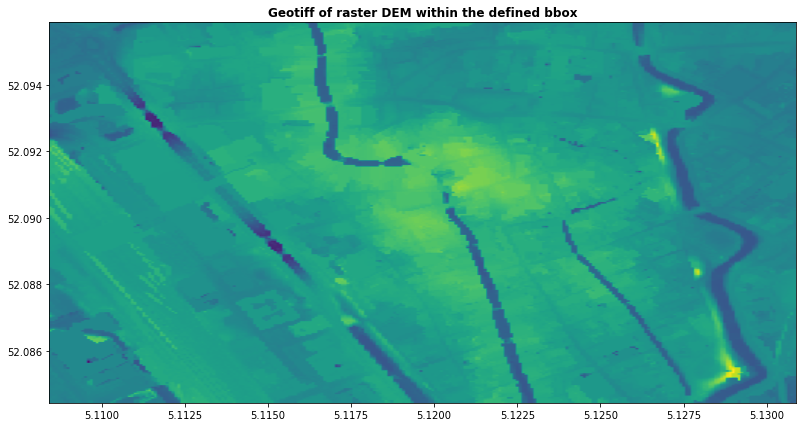

In [ ]:
fp = "hoogteZ_2020-09-30T13_14_56Z.tiff"
raster = rasterio.open(fp)
plt.figure(figsize=(20,7))
show(raster,title="Geotiff of raster DEM within the defined bbox");

### 9.2 How to query zonal statistics of  static raster data (spatial aggregation)?

The `zonal` endpoint of rasters is used to request zonal statistics for rasters. This means that for a raster within a certain polygon the following statistics can be calculated:
- sum
- count
- min
- max
- mean
- median
- p<percentile:any number between 0 and 100>


Spatial Aggregation - by using the endpoint **sum**| Spatial aggregation - by using the endpoint **mean**
- | - 
<img src="https://nens.lizard.net/media/projecten/lizard_tutorial/spatial_aggregation_method_sum.PNG" alt="Drawing" style="width: 500px;"/> | <img src="https://nens.lizard.net/media/projecten/lizard_tutorial/spatial_aggregation_method_mean.PNG" alt="Drawing" style="width: 500px;"/>

For the zonal statistics endpoint we use the following url: **nens.lizard.net/api/v4/rasters/**{uuid}**/zonal/**

In the example below, let's calculate the mean value of the raster DEM within a defined polygon:

In [ ]:
#define you polygon here
geom = 'POLYGON ((4.804847821873415 52.11667280734238, 4.806713259859531 52.11808327571072, 4.805608147820809 52.11856102711491, 4.819366745114616 52.12916174862249, 4.820391627911995 52.12882844174937, 4.825146482688536 52.13155708895362, 4.836760218799797 52.1320950542045, 4.839831083487208 52.13138455359988, 4.841855268314998 52.13279519337573, 4.844997575437689 52.13266472167823, 4.851613567129445 52.13095545048285, 4.850995342194573 52.13013121164453, 4.855100260574258 52.12826534499285, 4.858115526952704 52.1255730225948, 4.857260037781153 52.12489270966972, 4.857432505687366 52.12358885970951, 4.856966250193945 52.12318812892995, 4.857412305450096 52.12198214729695, 4.855523610331791 52.12072942129434, 4.855459491604404 52.1195211452892, 4.856410703395785 52.11874023894567, 4.857189725526387 52.11758407511068, 4.857006548770007 52.11648398314836, 4.858161027579516 52.11509998252357, 4.860588442243921 52.11558196309642, 4.862378153957152 52.11356052316284, 4.863167486792669 52.11317747763539, 4.862651303280372 52.11034849069802, 4.864831936661076 52.10842539029259, 4.864544590469517 52.1078322025319, 4.866034352158711 52.1062563318614, 4.867314973640948 52.10409968552982, 4.86967559135546 52.10353023647684, 4.865590360499596 52.09723068553979, 4.86211402445756 52.09595894201262, 4.861573683244572 52.09520757940017, 4.852430695728541 52.09876627241331, 4.846469734862426 52.10185569966663, 4.842415244351158 52.10297254568547, 4.837985745856069 52.10266207609867, 4.832555777932917 52.10394128701714, 4.831113012822775 52.10480424504518, 4.829541164175933 52.10500217933986, 4.82775049958501 52.10544065304562, 4.824631499045423 52.10542581163859, 4.825548195162908 52.10741128945562, 4.804847821873415 52.11667280734238))'

uuid = "730d6675-35dd-4a35-aa9b-bfb8155f9ca7"
raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/zonal/"

r = requests.get(
            url=get_url,
            headers=json_headers,
            params=
            {"geom": geom,
             #spatial aggregation averaged per month 
                   "zonal_statistic": "mean",
                   "pixel_size": "100",
                   "zonal_projection":"EPSG:28992", #projection to perform the aggregation in
            }
)
# write the data to a dataframe and convert the timestamp to datetime
mean_dem = pd.DataFrame(r.json()['results'], columns=['timestamp', 'mean'])
mean_dem['timestamp'] = pd.to_datetime(mean_dem['timestamp'], unit='s')
mean_dem

,timestamp,mean
0,NaT,NaN


### 9.3 How to query zonal statistics of  temporal raster data (temporal & spatial aggregation)?

For temporal rasters it is also possible to not only spatially aggregate (like previous example), but also perform aggregation over time. For this, we also use the `zonal` endpoint of rasters. In addition to the parameter "zonal_statistic", we also need to use the parameter "temporal_statistic".

In the example below using the Daily Rainfall Raster, let's calculate the monthly sum of the 5-minutes rainfall from April 1 to October 1, 2019. In addition, let's calculate the mean monthly rainfall within the defined polygon. So we need two different aggregation types:
* `temporal aggregation`: calculate per pixel the monthly rainfall sum from April 1 to October 1, 2019.
* `spatial aggregation`: calculate the mean value of all those pixels with the monthly rainfall sum, within the defined polygon




In [ ]:
geom = 'POLYGON ((4.804847821873415 52.11667280734238, 4.806713259859531 52.11808327571072, 4.805608147820809 52.11856102711491, 4.819366745114616 52.12916174862249, 4.820391627911995 52.12882844174937, 4.825146482688536 52.13155708895362, 4.836760218799797 52.1320950542045, 4.839831083487208 52.13138455359988, 4.841855268314998 52.13279519337573, 4.844997575437689 52.13266472167823, 4.851613567129445 52.13095545048285, 4.850995342194573 52.13013121164453, 4.855100260574258 52.12826534499285, 4.858115526952704 52.1255730225948, 4.857260037781153 52.12489270966972, 4.857432505687366 52.12358885970951, 4.856966250193945 52.12318812892995, 4.857412305450096 52.12198214729695, 4.855523610331791 52.12072942129434, 4.855459491604404 52.1195211452892, 4.856410703395785 52.11874023894567, 4.857189725526387 52.11758407511068, 4.857006548770007 52.11648398314836, 4.858161027579516 52.11509998252357, 4.860588442243921 52.11558196309642, 4.862378153957152 52.11356052316284, 4.863167486792669 52.11317747763539, 4.862651303280372 52.11034849069802, 4.864831936661076 52.10842539029259, 4.864544590469517 52.1078322025319, 4.866034352158711 52.1062563318614, 4.867314973640948 52.10409968552982, 4.86967559135546 52.10353023647684, 4.865590360499596 52.09723068553979, 4.86211402445756 52.09595894201262, 4.861573683244572 52.09520757940017, 4.852430695728541 52.09876627241331, 4.846469734862426 52.10185569966663, 4.842415244351158 52.10297254568547, 4.837985745856069 52.10266207609867, 4.832555777932917 52.10394128701714, 4.831113012822775 52.10480424504518, 4.829541164175933 52.10500217933986, 4.82775049958501 52.10544065304562, 4.824631499045423 52.10542581163859, 4.825548195162908 52.10741128945562, 4.804847821873415 52.11667280734238))'

uuid = "730d6675-35dd-4a35-aa9b-bfb8155f9ca7"
raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/zonal/"

r = requests.get(
            url=get_url,
            headers=json_headers,
            params=
            {"geom": geom,
                 #spatial aggregation averaged per month 
                 "zonal_statistic": "mean",
                 "pixel_size": "100", #pixel size to perform the aggregation in
                 "zonal_projection":"EPSG:28992",
                #temporal aggregation monthly sum
                 "start": "2019-04-01T00:0:00", 
                 "stop": "2019-10-01T00:00:00",
                 "temporal_statistic":"sum", # also possible to use count, min, max, mean and median
                 "frequency":'M', # monthly data

            }
)

# write the data to a dataframe and convert the timestamp to datetime
rain = pd.DataFrame(r.json()['results'], columns=['timestamp', 'average monthly rainfall sum'])
rain['timestamp'] = pd.to_datetime(rain['timestamp'], unit='s')
rain

NameError: name 'requests' is not defined

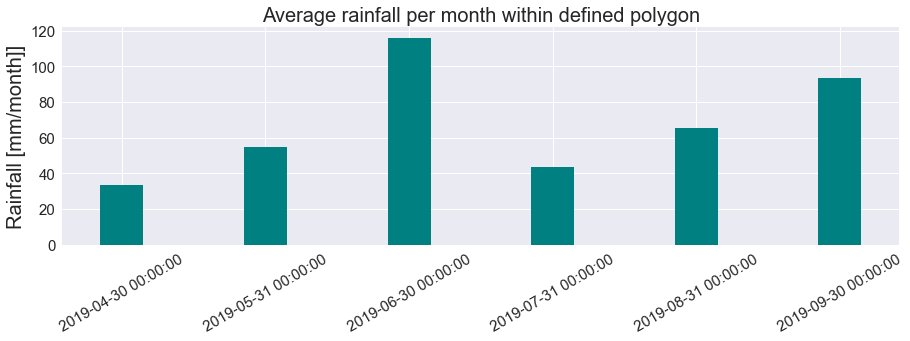

In [ ]:
plt.figure(figsize=(15,4))
plt.style.use('seaborn')
bars = rain['timestamp']
y_pos = np.arange(len(bars))
plt.bar(y_pos, rain['average monthly rainfall sum'], width=0.3, color='#008080')
plt.xticks(y_pos, bars, rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Rainfall [mm/month]]', fontsize=20)
plt.title('Average rainfall per month within defined polygon', fontsize=20)
plt.show()

### 9.4 How to query counts of unique values in nominal data?
 The `counts` endpoint is used to request the labeled counts of unique values in nominal raster data. An example of a raster with nominal data is the "Landuse" raster. For raster object defined by `uuid` and for the selected geometry `geom` using the colormapDefinition described by `style`, `counts` query returns:

- results: A list of dictionaries containing class number, sample count, color and label for that class.
- total : An estimate of the total amount of samples taken from the raster intersecting with `geom` 

For the `counts` rasters endpoint we use the following url: **nens.lizard.net/api/v4/rasters/**{uuid}**/counts/**


In the example below, let's query all the different categories of landuse within the raster "Landuse", and count the different land use  categories within the defined polygon.

In [ ]:
# uuid of the rasterobject you want to quary
uuid = "b464c2e4-b1f4-4af4-b9b8-6282461e941e"

raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/counts/"

# geometry and style is required
geom = 'POLYGON ((4.804847821873415 52.11667280734238, 4.806713259859531 52.11808327571072, 4.805608147820809 52.11856102711491, 4.819366745114616 52.12916174862249, 4.820391627911995 52.12882844174937, 4.825146482688536 52.13155708895362, 4.836760218799797 52.1320950542045, 4.839831083487208 52.13138455359988, 4.841855268314998 52.13279519337573, 4.844997575437689 52.13266472167823, 4.851613567129445 52.13095545048285, 4.850995342194573 52.13013121164453, 4.855100260574258 52.12826534499285, 4.858115526952704 52.1255730225948, 4.857260037781153 52.12489270966972, 4.857432505687366 52.12358885970951, 4.856966250193945 52.12318812892995, 4.857412305450096 52.12198214729695, 4.855523610331791 52.12072942129434, 4.855459491604404 52.1195211452892, 4.856410703395785 52.11874023894567, 4.857189725526387 52.11758407511068, 4.857006548770007 52.11648398314836, 4.858161027579516 52.11509998252357, 4.860588442243921 52.11558196309642, 4.862378153957152 52.11356052316284, 4.863167486792669 52.11317747763539, 4.862651303280372 52.11034849069802, 4.864831936661076 52.10842539029259, 4.864544590469517 52.1078322025319, 4.866034352158711 52.1062563318614, 4.867314973640948 52.10409968552982, 4.86967559135546 52.10353023647684, 4.865590360499596 52.09723068553979, 4.86211402445756 52.09595894201262, 4.861573683244572 52.09520757940017, 4.852430695728541 52.09876627241331, 4.846469734862426 52.10185569966663, 4.842415244351158 52.10297254568547, 4.837985745856069 52.10266207609867, 4.832555777932917 52.10394128701714, 4.831113012822775 52.10480424504518, 4.829541164175933 52.10500217933986, 4.82775049958501 52.10544065304562, 4.824631499045423 52.10542581163859, 4.825548195162908 52.10741128945562, 4.804847821873415 52.11667280734238))'
style = 'lc-fun-1801c' 

# request the data
r = requests.get(
            url=get_url,
            headers=json_headers,
            params=
            {"geom": geom,
             "style" : style
            }
)

#Retrieve the 'results' attribute of the response using a JSON interpreter
landuse = pd.DataFrame(r.json()['results'])
landuse 

,class,count,color,label
0,27,29012,#ffffe5,Verkeerseiland
1,144,3729,#ad7623,Spruitjes
2,120,1182,#ad7623,Peulen
3,16,546,#dbdbdb,Bedrijventerrein
4,254,459,#235aad,Top10 - Water
5,253,282,#ffffff,Onbekend
6,2,245,#ad2323,Woonfunctie
7,252,240,#00ffff,252
8,14,226,#ad2323,Overige gebruiksfunctie
9,39,183,#6b8019,Bos/Natuur


We will get back from the API a dataframe with the different categories landuse within the defined polygon, and how many pixels within that dataframe belong to a certain categorie (count column). Let's easily calculate the percentages according to the counts:

In [ ]:
#total amount of pixels
np.sum(landuse['count'])
# voeg een kolom in de dataframe toe met percentage landgebruik
landuse['percentage'] = landuse['count']/np.sum(landuse['count']) * 100
landuse

,class,count,color,label,percentage
0,27,29012,#ffffe5,Verkeerseiland,80.356747
1,144,3729,#ad7623,Spruitjes,10.328495
2,120,1182,#ad7623,Peulen,3.273875
3,16,546,#dbdbdb,Bedrijventerrein,1.512298
4,254,459,#235aad,Top10 - Water,1.271327
5,253,282,#ffffff,Onbekend,0.781077
6,2,245,#ad2323,Woonfunctie,0.678595
7,252,240,#00ffff,252,0.664746
8,14,226,#ad2323,Overige gebruiksfunctie,0.625969
9,39,183,#6b8019,Bos/Natuur,0.506869


Let's plot the percentages of the landuse categories within a barplot:

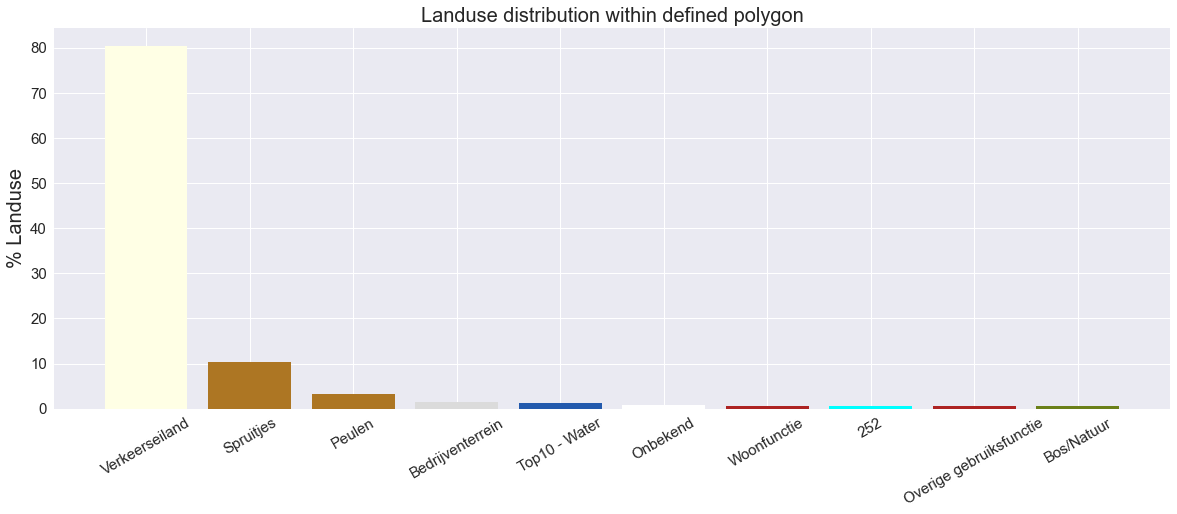

In [ ]:
plt.figure(figsize=(20,7))
plt.style.use('seaborn')
bars = landuse['label']
colors = landuse['color']
y_pos = np.arange(len(bars))
plt.bar(y_pos, landuse['percentage'], color=colors)
plt.xticks(y_pos, bars, rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('% Landuse', fontsize=20)
plt.title('Landuse distribution within defined polygon', fontsize=20)
plt.show()

### 9.5 How to query distribution of data in a raster with a CURVE 
The `curve` endpoint is used to request percentile values describing the distribution of data in a selection of a raster. It is possible to calculate this for the whole raster, or for a certain region within the raster (defined by "geom"). 

For the `curve` rasters endpoint we use the following url: **nens.lizard.net/api/v4/rasters/**{uuid}**/curve/**

In the example below, let's query the percentile distribution of the raster DEM within a defined polygon.

In [ ]:
# Find the uuid of the rasterobject you want to query
uuid = "1d65a4e1-ac2f-4e66-9e52-1d130d870a34"

raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/curve/" # we use the curve endpoint

# Geometry defining the special extend of this raster data
geom = 'POLYGON ((4.804847821873415 52.11667280734238, 4.806713259859531 52.11808327571072, 4.805608147820809 52.11856102711491, 4.819366745114616 52.12916174862249, 4.820391627911995 52.12882844174937, 4.825146482688536 52.13155708895362, 4.836760218799797 52.1320950542045, 4.839831083487208 52.13138455359988, 4.841855268314998 52.13279519337573, 4.844997575437689 52.13266472167823, 4.851613567129445 52.13095545048285, 4.850995342194573 52.13013121164453, 4.855100260574258 52.12826534499285, 4.858115526952704 52.1255730225948, 4.857260037781153 52.12489270966972, 4.857432505687366 52.12358885970951, 4.856966250193945 52.12318812892995, 4.857412305450096 52.12198214729695, 4.855523610331791 52.12072942129434, 4.855459491604404 52.1195211452892, 4.856410703395785 52.11874023894567, 4.857189725526387 52.11758407511068, 4.857006548770007 52.11648398314836, 4.858161027579516 52.11509998252357, 4.860588442243921 52.11558196309642, 4.862378153957152 52.11356052316284, 4.863167486792669 52.11317747763539, 4.862651303280372 52.11034849069802, 4.864831936661076 52.10842539029259, 4.864544590469517 52.1078322025319, 4.866034352158711 52.1062563318614, 4.867314973640948 52.10409968552982, 4.86967559135546 52.10353023647684, 4.865590360499596 52.09723068553979, 4.86211402445756 52.09595894201262, 4.861573683244572 52.09520757940017, 4.852430695728541 52.09876627241331, 4.846469734862426 52.10185569966663, 4.842415244351158 52.10297254568547, 4.837985745856069 52.10266207609867, 4.832555777932917 52.10394128701714, 4.831113012822775 52.10480424504518, 4.829541164175933 52.10500217933986, 4.82775049958501 52.10544065304562, 4.824631499045423 52.10542581163859, 4.825548195162908 52.10741128945562, 4.804847821873415 52.11667280734238))'

# request the data
r = requests.get(
            url=get_url,
            headers=json_headers,
            params=
            {"geom": geom
            }
)

#Retrieve the 'results' attribute of the response using a JSON interpreter
#and write it to a dataframe with column names percentage and value
dem_curve = pd.DataFrame(r.json()['results'], columns=['percentage', 'value'])
dem_curve

,percentage,value
0,0,-3.026000
1,1,-2.516000
2,2,-2.486000
3,3,-2.457263
4,4,-2.427263
...,...,...
96,96,-1.606000
97,97,-1.556000
98,98,-1.487367
99,99,-1.375000


We can use the data to plot the distribution of the DEM within the defined polygon:

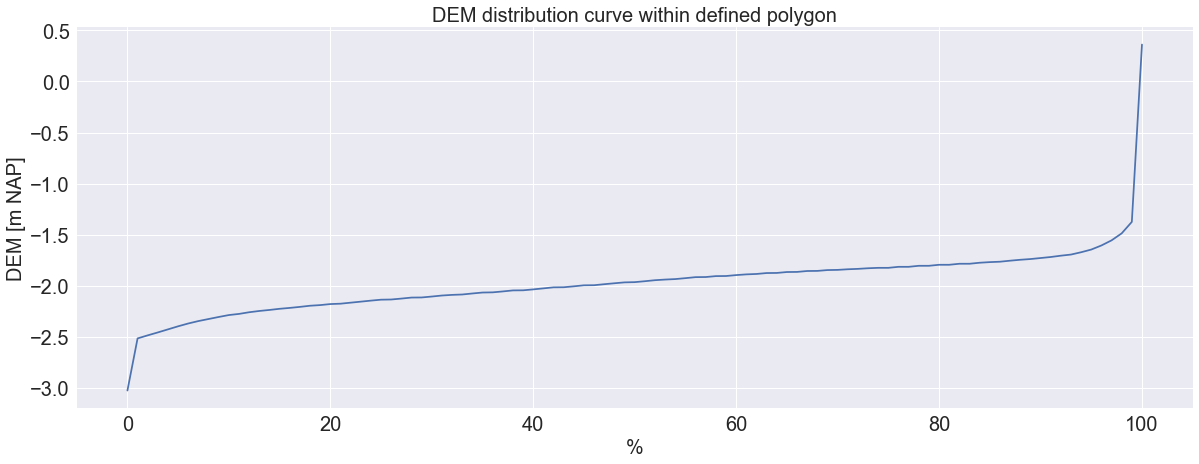

In [ ]:
dem_curve.set_index('percentage', inplace=True)
dem_curve.plot(figsize=(20,7));
plt.legend('');
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('DEM [m NAP]', fontsize=20)
plt.xlabel('%', fontsize=20)
plt.title('DEM distribution curve within defined polygon', fontsize=20)
plt.show()

### 9.6. How to query a line crosssection of a raster?
The `line` endpoint is used to return a line crossection of a raster as (distance, value) pairs. 

For the `line` rasters endpoint we use the following url:**nens.lizard.net/api/v4/rasters/**{uuid}**/line/**

In the example below we will query the surface level (DEM) profile of a cross section defined by `uuid` and `geom`.

In [ ]:
# Find the uuid of the rasterobject you want to query
uuid = "1d65a4e1-ac2f-4e66-9e52-1d130d870a34"

raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/line/" # we use the line endpoint

# Geometry defining the linestring of this raster data (coordinates of point 1 to coordinates of point 2)
#distance starts calculating from point 1 (distance=0 at point 1)
geom = 'LINESTRING (5.5206298828125 51.964577109947506, 5.855712890625 52.07950600379697)'

# request the data
r = requests.get(
            url=get_url,
            headers=json_headers,
            params=
            {"geom": geom
            }
)

#Retrive the 'results' attribute of the response using a JSON interpreter
# and write it to a dataframe with column names percentage and value
dem_crossection = pd.DataFrame(r.json()['results'], columns=['distance', 'DEM'])
dem_crossection

,distance,DEM
0,7.888914,5.479456
1,39.635947,6.629456
2,148.316459,6.629456
3,256.996971,5.729456
4,324.754340,6.033000
...,...,...
322,26014.278360,38.654999
323,26122.958872,38.654999
324,26231.639384,39.855000
325,26307.719276,40.285000


We can use the data to plot the crosssection of the selected line:

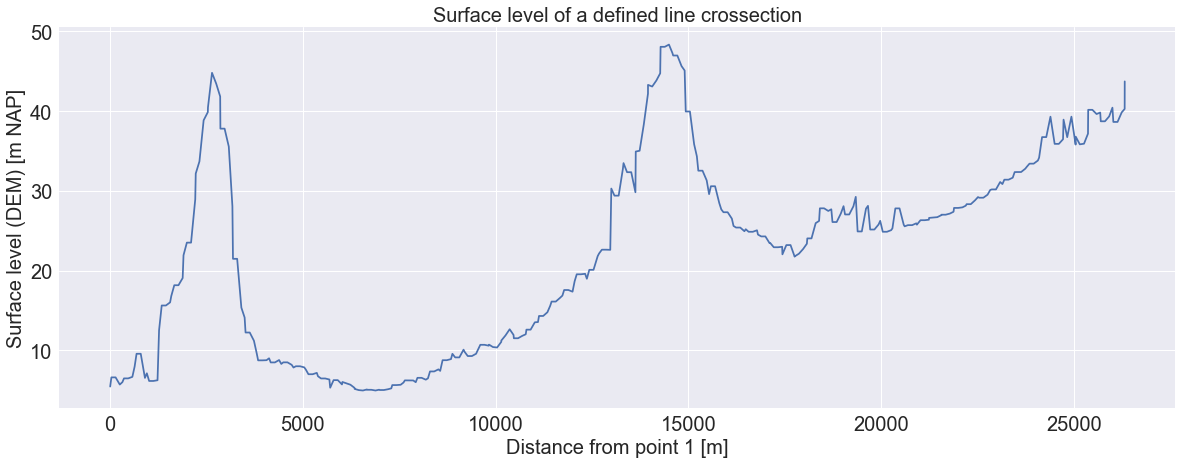

In [ ]:
dem_crossection.set_index('distance', inplace=True)
dem_crossection.plot(figsize=(20,7));
plt.legend('');
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Surface level (DEM) [m NAP]', fontsize=20)
plt.xlabel('Distance from point 1 [m]', fontsize=20)
plt.title('Surface level of a defined line crossection', fontsize=20)
plt.show()

### 9.7 How to query data of a selected point within a raster?
The `point` endpoint is used to return data of the selected point location within the raster. 

For the `point` rasters endpoint we use the following url:**nens.lizard.net/api/v4/rasters/**{uuid}**/point/**

In the example below we will request the surface level (DEM) of the point defined in the "geometry" parameter.

In [ ]:
# Find the uuid of the rasterobject you want to query
uuid = "1d65a4e1-ac2f-4e66-9e52-1d130d870a34"

raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/point/" # we use the point endpoint

# Geometry defining the point geometry
geom = 'POINT (4.647216796875 51.84256565377846)'

# request the data
r = requests.get(
            url=get_url,
            headers=json_headers,
            params=
            {"geom": geom
            }
)

#Retrive the 'results' attribute of the response using a JSON interpreter
# and write it to a dataframe with column names point and value
dem_point = pd.DataFrame(r.json()['results'], columns=['point', 'value'])
dem_point

print ('The surface level (DEM) of the selected point is :', np.round(dem_point['value'][0],2), 'm NAP')

The surface level (DEM) of the selected point is : -1.16 m NAP


In the example above the DEM raster is used, which is a raster with static data. The endpoint `point` can also be used for rasters with temporal data. So let's retrieve from the same point as in the example above, the daily summed up rainfall of the 5-minutes rainfall raster from April 1 to April 10, 2019.

In [ ]:
# Find the uuid of the rasterobject you want to query
uuid = "730d6675-35dd-4a35-aa9b-bfb8155f9ca7"

raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/point/" # we use the point endpoint

# Geometry defining the point geometry
geom = 'POINT (4.647216796875 51.84256565377846)'

# request the data
r = requests.get(
            url=get_url,
            headers=json_headers,
            params=
                {"geom": geom,
                #temporal aggregation monthly sum
                 "start": "2019-04-01T00:0:00", 
                 "stop": "2019-04-10T00:00:00",
                 "statistic":"sum", # also possible to use count, min, max, mean and median
                 "frequency":'D', # daily data
            })

rain_point = pd.DataFrame(r.json()['results'], columns=['timestamp', 'value'])
rain_point['timestamp'] = pd.to_datetime(rain_point['timestamp'], unit='s')
rain_point.set_index('timestamp', inplace=True)
rain_point

,value
timestamp,
2019-04-01,0.00
2019-04-02,13.04
2019-04-03,3.95
2019-04-04,0.00
2019-04-05,0.00
2019-04-06,0.00
2019-04-07,0.00
2019-04-08,0.61
2019-04-09,0.00


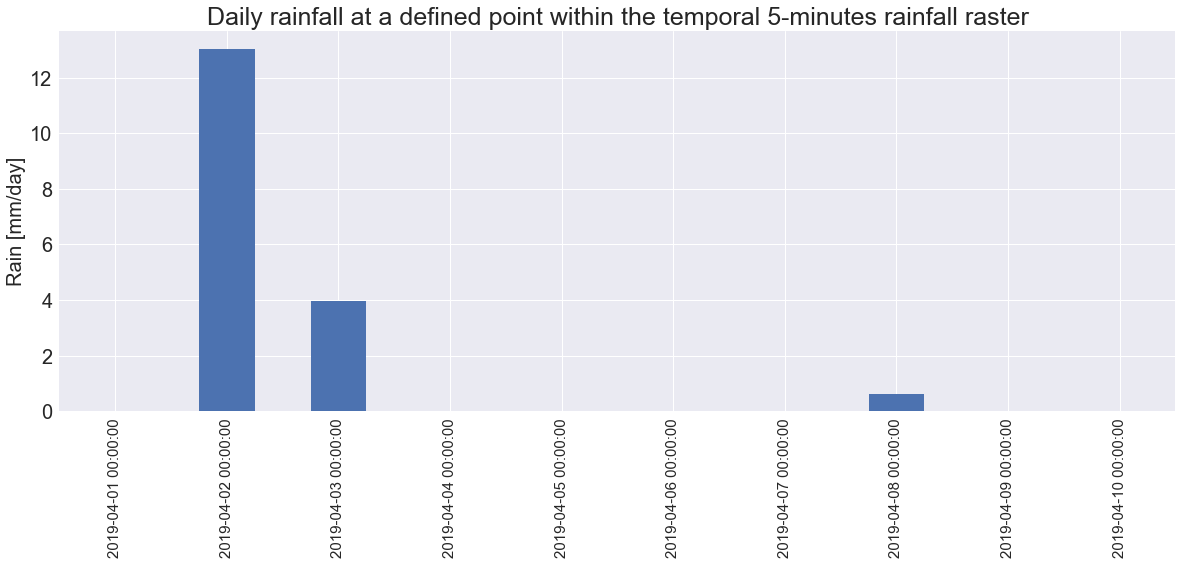

In [ ]:
rain_point.plot(figsize=(20,7), kind='bar')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.ylabel('Rain [mm/day]', fontsize=20)
plt.xlabel('');
plt.title('Daily rainfall at a defined point within the temporal 5-minutes rainfall raster', fontsize=25)
plt.legend('');

### 9.8 How to query applicable projections for a raster?
The `projections` endpoint is used to return the list of aplicable projections for a raster. 

For the `projections` rasters endpoint we use the following url:**nens.lizard.net/api/v4/rasters/**{uuid}**/projections/**

In the example below, let's request the list of projections for the raster "Landuse".

In [ ]:
# Find the uuid of the rasterobject you want to query
uuid = "1d65a4e1-ac2f-4e66-9e52-1d130d870a34"

raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/projections/" # we use the projections endpoint


# request the data
r = requests.get(
            url=get_url,
            headers=json_headers,
)

#Retrive the 'results' attribute of the response using a JSON interpreter
projections_list = pd.DataFrame(r.json()['results'])
projections_list

,url,name,code,extent
0,https://nens.lizard.net/api/v4/projections/EPS...,Belge 1950 (Brussels) / Belge Lambert 50,EPSG:21500,"{'south': 49.5, 'west': 2.5, 'north': 51.51, '..."
1,https://nens.lizard.net/api/v4/projections/EPS...,RGF93 / Lambert-93,EPSG:2154,"{'south': 41.15, 'west': -9.86, 'north': 51.56..."
2,https://nens.lizard.net/api/v4/projections/EPS...,US National Atlas Equal Area,EPSG:2163,"{'south': 15.56, 'west': -65.69, 'north': 74.7..."
3,https://nens.lizard.net/api/v4/projections/EPS...,ED50 / France EuroLambert,EPSG:2192,"{'south': 42.33, 'west': -4.87, 'north': 51.14..."
4,https://nens.lizard.net/api/v4/projections/EPS...,ED50 / UTM zone 31N,EPSG:23031,"{'south': 38.56, 'west': 0.0, 'north': 82.41, ..."
5,https://nens.lizard.net/api/v4/projections/EPS...,ED50 / UTM zone 32N,EPSG:23032,"{'south': 36.53, 'west': 5.99, 'north': 83.92,..."
6,https://nens.lizard.net/api/v4/projections/EPS...,ED50 / TM 0 N,EPSG:23090,"{'south': 51.03, 'west': -5.05, 'north': 62.03..."
7,https://nens.lizard.net/api/v4/projections/EPS...,ED50 / TM 5 NE,EPSG:23095,"{'south': 51.45, 'west': 2.53, 'north': 55.77,..."
8,https://nens.lizard.net/api/v4/projections/EPS...,ETRS89 / UTM zone 31N,EPSG:25831,"{'south': 37.0, 'west': 0.0, 'north': 82.41, '..."
9,https://nens.lizard.net/api/v4/projections/EPS...,ETRS89 / UTM zone 32N,EPSG:25832,"{'south': 38.76, 'west': 6.0, 'north': 83.92, ..."


### 9.10 How to query rain recurrance statistics?

The `rrc` endpoint is used to return the rain recurrance statistics of a point defined by `geom`. 

For the `rrc` rasters endpoint we use the following url:**nens.lizard.net/api/v4/rasters/**{uuid}**/rrc/**

In [ ]:
# Find the uuid of the rasterobject you want to quary
uuid = "730d6675-35dd-4a35-aa9b-bfb8155f9ca7"

raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/rrc/" # we use the rrc endpoint

# Geometry defining the point geometry
geom = 'POINT (4.647216796875 51.84256565377846)'

# Start Stop timestamps in ISO8601 format 
start = '2020-09-23T14:10:00'
stop = '2020-09-25T17:10:00'

#integer time resolution in miliseconds
time_resolution = 3000


# request the data
r = requests.get(
            url=get_url,
            headers=json_headers,
            params=
            {"geom" : geom,
             "start": start,
             "stop": stop,
             "time_resolution": time_resolution
            }
)

#Retrive the 'results' attribute of the response using a JSON interpreter
rrc_statistics = pd.DataFrame(r.json()['results'])
rrc_statistics['start'] = pd.to_datetime(rrc_statistics['start'], unit='ms')
rrc_statistics['end'] = pd.to_datetime(rrc_statistics['end'], unit='ms')
rrc_statistics

,start,end,t,td_window,max,t_choice
0,2020-09-23 14:10:00,2020-09-25 17:10:00,-,2 dag(en),13.84,NaN
1,2020-09-23 17:00:00,2020-09-25 17:00:00,T <= 1,2 dag(en),12.59,1.0
2,2020-09-23 14:15:00,2020-09-24 14:15:00,T <= 1,1 dag(en),9.57,1.0
3,2020-09-23 20:25:00,2020-09-23 23:25:00,T <= 1,3 uur,6.24,1.0
4,2020-09-23 20:30:00,2020-09-23 21:30:00,T <= 1,1 uur,3.86,1.0
5,2020-09-23 21:00:00,2020-09-23 21:30:00,T <= 1,30 minuten,2.53,1.0
6,2020-09-23 21:00:00,2020-09-23 21:15:00,T <= 1,15 minuten,1.86,1.0


### 9.11 How to query timesteps of the raster?

The `timesteps` endpoint is used to list the timesteps for a raster.

For the `timesteps` rasters endpoint we use the following url:**nens.lizard.net/api/v4/rasters/**{uuid}**/timesteps/**

In the example below, we use the "5-minutes Rain" raster. So the query should give back all the 5-minutes timesteps between the start- and endtime.

In [ ]:
uuid = "730d6675-35dd-4a35-aa9b-bfb8155f9ca7"

raster_url = "https://nens.lizard.net/api/v4/rasters/"
get_url = f"{raster_url}{uuid}/timesteps/" # we use the timesteps endpoint


# request the data
r = requests.get(
            url=get_url,
            headers=json_headers,
)

#Retrive the 'results' attribute of the response using a JSON interpreter
timesteps = pd.DataFrame(r.json())
timesteps['time_start'] = pd.to_datetime(timesteps['time_start'], unit='ms')
timesteps['time_end'] = pd.to_datetime(timesteps['time_end'], unit='ms')
timesteps['steps'] = pd.to_datetime(timesteps['steps'], unit='ms')
timesteps

,time_start,time_end,steps
0,2010-01-01,2020-10-01 14:00:00,2010-01-01 00:00:00
1,2010-01-01,2020-10-01 14:00:00,2010-01-01 00:05:00
2,2010-01-01,2020-10-01 14:00:00,2010-01-01 00:10:00
3,2010-01-01,2020-10-01 14:00:00,2010-01-01 00:15:00
4,2010-01-01,2020-10-01 14:00:00,2010-01-01 00:20:00
...,...,...,...
1130852,2010-01-01,2020-10-01 14:00:00,2020-10-01 13:40:00
1130853,2010-01-01,2020-10-01 14:00:00,2020-10-01 13:45:00
1130854,2010-01-01,2020-10-01 14:00:00,2020-10-01 13:50:00
1130855,2010-01-01,2020-10-01 14:00:00,2020-10-01 13:55:00
